In [36]:
%run functions.ipynb
from time import perf_counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Wielkość populacji
x = 800
# Liczba genów osobnika
n = 0
# Inicjowanie osobnika zerami (w przypadku tych zadan nie ma sensu)
start_wth_zeros = False
# Pradopodobieństwo mutacji
p_mutate = 0.2
# Zakończ, jeśli wynik najlepszego osobnika nie zmienił się od ... iteracji.
end_optim=100

In [61]:
data = pd.DataFrame(columns=['Czas','Wynik','Odchylenie','Sekwencyjny',
                             'Funkcja','Liczba genów',
                             'Liczba procesów'])
iteracje = 10
ns = [2,10,20,50,100]

## Sekwencyjny

In [62]:
def time_it(n, func, iteracje=10):
    best_scores = []
    times = []
    for _ in range(iteracje):
        t_start = perf_counter()
        population = initial_pop_generation(x,n,start_wth_zeros,min_value_n,max_value_n)
        best_gen, best_score,_,_ = optimize(population,x,n,func, min_or_max,end_optim,p_mutate)
        t_stop = perf_counter()
        best_scores.append(round(best_score,2))
        times.append(t_stop-t_start)
    
    time = round(sum(times)/len(times),2)
    score = np.mean(best_scores)
    std_dev = np.std(best_scores)
    print('Sredni czas: ', time)
    print('Srednia ocena:', score)

    if func==func1:
        function = 1
    else:
        function = 2
    
    result = [time,score,std_dev,True,function,n,np.NaN]
    
    return result

### Funkcja 1 

In [63]:
# Funkcja oceny
function = func1
# Cel (min/max)
min_or_max='min'
# Minimalna wartość genu
min_value_n = -40
# Maksymalna wartość genu
max_value_n = 40

In [64]:
for n in ns:
    print('Liczba genów: ', n)
    result = time_it(n,func1)
    data.loc[len(data)] = result

Liczba genów:  2
Sredni czas:  3.25
Srednia ocena: 0.0
Liczba genów:  10
Sredni czas:  5.18
Srednia ocena: 0.0
Liczba genów:  20
Sredni czas:  8.55
Srednia ocena: 0.0
Liczba genów:  50
Sredni czas:  26.46
Srednia ocena: 0.15499999999999997
Liczba genów:  100
Sredni czas:  50.41
Srednia ocena: 0.9570000000000001


In [65]:
data.head()

,Czas,Wynik,Odchylenie,Sekwencyjny,Funkcja,Liczba genów,Liczba procesów
0,3.25,0.000,0.000000,True,1,2,NaN
1,5.18,0.000,0.000000,True,1,10,NaN
2,8.55,0.000,0.000000,True,1,20,NaN
3,26.46,0.155,0.046744,True,1,50,NaN
4,50.41,0.957,0.097985,True,1,100,NaN


### Funkcja 2

In [66]:
# Funkcja oceny
function = func2
# Cel (min/max)
min_or_max='max'
# Minimalna wartość genu
min_value_n = -30
# Maksymalna wartość genu
max_value_n = 30

In [67]:
for n in ns:
    print('Liczba genów: ', n)
    result = time_it(n,func2)
    data.loc[len(data)] = result

Liczba genów:  2
Sredni czas:  1.55
Srednia ocena: 0.0
Liczba genów:  10
Sredni czas:  4.64
Srednia ocena: 0.0
Liczba genów:  20
Sredni czas:  6.92
Srednia ocena: 0.0
Liczba genów:  50
Sredni czas:  19.64
Srednia ocena: -1.373
Liczba genów:  100
Sredni czas:  37.03
Srednia ocena: -2.257


In [68]:
data

,Czas,Wynik,Odchylenie,Sekwencyjny,Funkcja,Liczba genów,Liczba procesów
0,3.25,0.000,0.000000,True,1,2,NaN
1,5.18,0.000,0.000000,True,1,10,NaN
2,8.55,0.000,0.000000,True,1,20,NaN
3,26.46,0.155,0.046744,True,1,50,NaN
4,50.41,0.957,0.097985,True,1,100,NaN
5,1.55,0.000,0.000000,True,2,2,NaN
6,4.64,0.000,0.000000,True,2,10,NaN
7,6.92,0.000,0.000000,True,2,20,NaN
8,19.64,-1.373,0.159063,True,2,50,NaN
9,37.03,-2.257,0.114983,True,2,100,NaN


## Multiprocessing

In [69]:
# Wielkość populacji
x = 100
# Liczba genów osobnika
n = 0
# Inicjowanie osobnika zerami (w przypadku tych zadan nie ma sensu)
start_wth_zeros = False
# Pradopodobieństwo mutacji
p_mutate = 0.2
# Zakończ, jeśli wynik najlepszego osobnika nie zmienił się od ... iteracji.
end_optim=100
# Liczba procesów
p_num=8
# Utworzenie managera procesów
manager = mp.Manager()

### Funkcja 1 

In [70]:
# Funkcja oceny
function = func1
# Cel (min/max)
min_or_max='min'
# Minimalna wartość genu
min_value_n = -40
# Maksymalna wartość genu
max_value_n = 40

In [71]:
for n in ns:
    best_scores = []
    times = []
    for _ in range(iteracje):
        t_start = perf_counter()
        best_score, best_gen = run_mp_alg(manager,x,n,function,min_or_max,
                            end_optim,p_mutate,p_num,
                            start_wth_zeros,min_value_n,max_value_n)
        t_stop = perf_counter()
        best_scores.append(round(best_score,2))
        times.append(t_stop-t_start)
    
    time = round(sum(times)/len(times),2)
    score = np.mean(best_scores)
    std_dev = np.std(best_scores)
    print('N:',n)
    print('Sredni czas: ', time)
    print('Srednia ocena:', score)
    
    result = [time,score,std_dev,False,1,n,p_num]
    data.loc[len(data)] = result

N: 2
Sredni czas:  0.64
Srednia ocena: 0.0
N: 10
Sredni czas:  1.1
Srednia ocena: 0.0
N: 20
Sredni czas:  2.22
Srednia ocena: 0.0
N: 50
Sredni czas:  7.55
Srednia ocena: 0.14800000000000002
N: 100
Sredni czas:  14.69
Srednia ocena: 0.907


In [72]:
data.head()

,Czas,Wynik,Odchylenie,Sekwencyjny,Funkcja,Liczba genów,Liczba procesów
0,3.25,0.000,0.000000,True,1,2,NaN
1,5.18,0.000,0.000000,True,1,10,NaN
2,8.55,0.000,0.000000,True,1,20,NaN
3,26.46,0.155,0.046744,True,1,50,NaN
4,50.41,0.957,0.097985,True,1,100,NaN


### Funkcja 2

In [73]:
# Minimalna wartość genu
min_value_n = -30
# Maksymalna wartość genu
max_value_n = 30
# Funkcja oceny
function = func2
# Cel (min/max)
min_or_max='max'
# Utworzenie nowego managera procesów
manager = mp.Manager()

In [74]:
for n in ns:
    best_scores = []
    times = []
    for _ in range(iteracje):
        t_start = perf_counter()
        best_score, best_gen = run_mp_alg(manager,x,n,function,min_or_max,
                            end_optim,p_mutate,p_num,
                            start_wth_zeros,min_value_n,max_value_n)
        t_stop = perf_counter()
        best_scores.append(round(best_score,2))
        times.append(t_stop-t_start)
    
    time = round(sum(times)/len(times),2)
    score = np.mean(best_scores)
    std_dev = np.std(best_scores)
    print('N:',n)
    print('Sredni czas: ', time)
    print('Srednia ocena:', score)
    
    result = [time,score,std_dev,False,2,n,p_num]
    data.loc[len(data)] = result

N: 2
Sredni czas:  0.57
Srednia ocena: 0.0
N: 10
Sredni czas:  0.98
Srednia ocena: 0.0
N: 20
Sredni czas:  1.72
Srednia ocena: 0.0
N: 50
Sredni czas:  5.6
Srednia ocena: -1.292
N: 100
Sredni czas:  11.29
Srednia ocena: -2.242


In [75]:
data.to_csv('czasy_800vs100.csv')

In [111]:
data = pd.read_csv('czasy_100.csv')
data = data.drop(axis=1, labels='Unnamed: 0')

In [112]:
data.rename(columns={'Sekwencyjny':'Algorytm'}, inplace=True)
data['Algorytm'] = data['Algorytm'].map({True: 'Sekwencyjny',
                                         False: 'Zrównoleglony'})

In [113]:
data['Wynik_abs'] = abs(data['Wynik'])

In [114]:
data

,Czas,Wynik,Odchylenie,Algorytm,Funkcja,Liczba genów,Liczba procesów,Wynik_abs
0,0.49,0.000,0.000000,Sekwencyjny,1,2,NaN,0.000
1,0.74,0.000,0.000000,Sekwencyjny,1,10,NaN,0.000
2,1.34,0.000,0.000000,Sekwencyjny,1,20,NaN,0.000
3,4.01,0.213,0.018466,Sekwencyjny,1,50,NaN,0.213
4,7.01,1.156,0.103750,Sekwencyjny,1,100,NaN,1.156
5,0.44,0.000,0.000000,Sekwencyjny,2,2,NaN,0.000
6,0.68,0.000,0.000000,Sekwencyjny,2,10,NaN,0.000
7,1.10,0.000,0.000000,Sekwencyjny,2,20,NaN,0.000
8,2.55,-1.643,0.096442,Sekwencyjny,2,50,NaN,1.643
9,4.90,-2.421,0.124455,Sekwencyjny,2,100,NaN,2.421


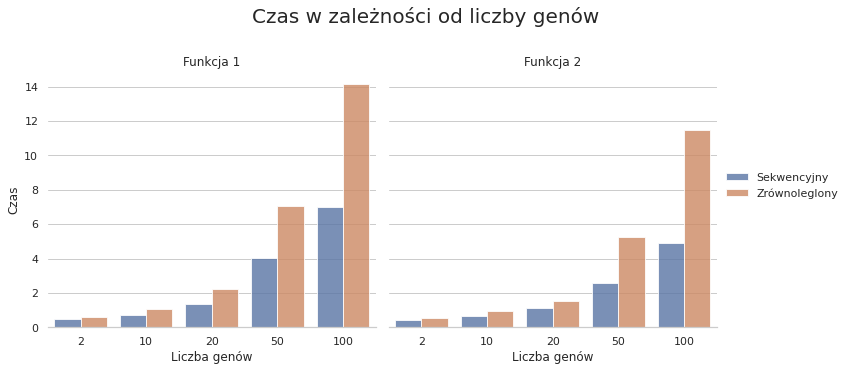

In [58]:
sns.set_theme(style='whitegrid')
g = sns.catplot(data=data,kind='bar',
           x='Liczba genów', y='Czas', hue='Algorytm',
           alpha=0.8, col='Funkcja')
g.despine(left=True)
g.legend.set_title('')
g.set_titles("Funkcja {col_name}")
g.fig.suptitle('Czas w zależności od liczby genów', fontsize=20,
              fontdict={'weight':'bold'})
g.fig.subplots_adjust(top=.8)

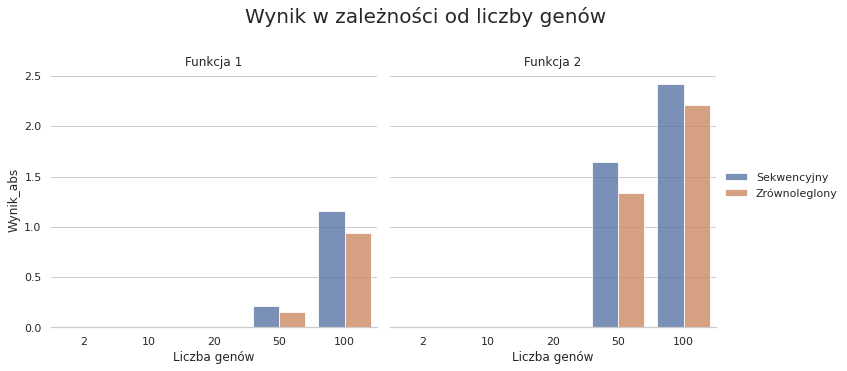

In [59]:
sns.set_theme(style='whitegrid')
g = sns.catplot(data=data,kind='bar',
           x='Liczba genów', y='Wynik_abs', hue='Algorytm',
           alpha=0.8, col='Funkcja')
g.despine(left=True)
g.legend.set_title('')
g.set_titles("Funkcja {col_name}")
g.fig.suptitle('Wynik w zależności od liczby genów', fontsize=20,
              fontdict={'weight':'bold'})
g.fig.subplots_adjust(top=.8)

In [115]:
data2 = pd.read_csv('czasy_800vs100.csv')
data2 = data2.drop(axis=1, labels='Unnamed: 0')

In [116]:
data2.rename(columns={'Sekwencyjny':'Algorytm'}, inplace=True)
data2['Algorytm'] = data2['Algorytm'].map({True: 'Sekwencyjny',
                                         False: 'Zrównoleglony'})

In [117]:
data2['Wynik_abs'] = abs(data2['Wynik'])

In [120]:
data2

,Czas,Wynik,Odchylenie,Algorytm,Funkcja,Liczba genów,Liczba procesów,Wynik_abs
0,3.25,0.000,0.000000,Sekwencyjny,1,2,NaN,0.000
1,5.18,0.000,0.000000,Sekwencyjny,1,10,NaN,0.000
2,8.55,0.000,0.000000,Sekwencyjny,1,20,NaN,0.000
3,26.46,0.155,0.046744,Sekwencyjny,1,50,NaN,0.155
4,50.41,0.957,0.097985,Sekwencyjny,1,100,NaN,0.957
5,1.55,0.000,0.000000,Sekwencyjny,2,2,NaN,0.000
6,4.64,0.000,0.000000,Sekwencyjny,2,10,NaN,0.000
7,6.92,0.000,0.000000,Sekwencyjny,2,20,NaN,0.000
8,19.64,-1.373,0.159063,Sekwencyjny,2,50,NaN,1.373
9,37.03,-2.257,0.114983,Sekwencyjny,2,100,NaN,2.257


In [127]:
data3 = data.append(data2, ignore_index=True)

In [128]:
data3.drop(data3.index[0:10], inplace=True )
data3.drop(data3.index[20:30], inplace=True )
data3 = data3.reset_index()
data3.drop('index', axis=1)

,Czas,Wynik,Odchylenie,Algorytm,Funkcja,Liczba genów,Liczba procesów,Wynik_abs
0,0.62,0.000,0.000000,Zrównoleglony,1,2,8.0,0.000
1,1.06,0.000,0.000000,Zrównoleglony,1,10,8.0,0.000
2,2.22,0.000,0.000000,Zrównoleglony,1,20,8.0,0.000
3,7.07,0.154,0.032924,Zrównoleglony,1,50,8.0,0.154
4,14.16,0.940,0.109179,Zrównoleglony,1,100,8.0,0.940
5,0.54,0.000,0.000000,Zrównoleglony,2,2,8.0,0.000
6,0.94,0.000,0.000000,Zrównoleglony,2,10,8.0,0.000
7,1.53,0.000,0.000000,Zrównoleglony,2,20,8.0,0.000
8,5.25,-1.337,0.081370,Zrównoleglony,2,50,8.0,1.337
9,11.50,-2.215,0.075000,Zrównoleglony,2,100,8.0,2.215


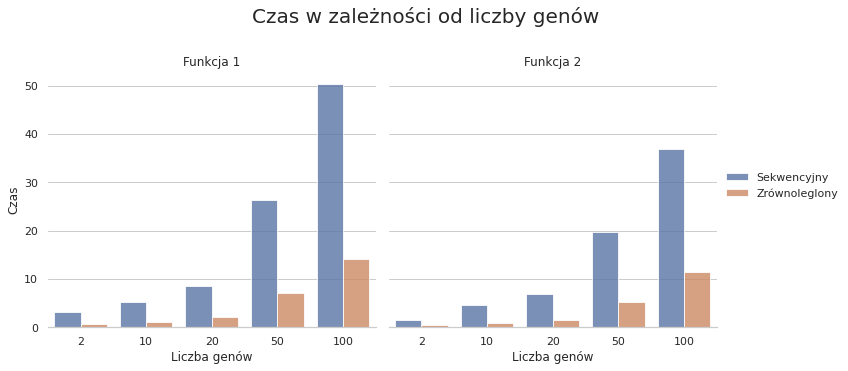

In [132]:
sns.set_theme(style='whitegrid')
g = sns.catplot(data=data3,kind='bar',
           x='Liczba genów', y='Czas', hue='Algorytm', hue_order = ['Sekwencyjny', 'Zrównoleglony'],
           alpha=0.8, col='Funkcja')
g.despine(left=True)
g.legend.set_title('')
g.set_titles("Funkcja {col_name}")
g.fig.suptitle('Czas w zależności od liczby genów', fontsize=20,
              fontdict={'weight':'bold'})
g.fig.subplots_adjust(top=.8)

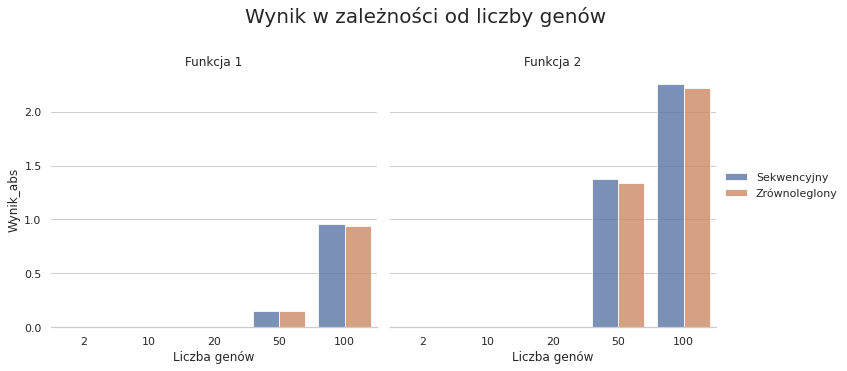

In [135]:
sns.set_theme(style='whitegrid')
g = sns.catplot(data=data3,kind='bar',
           x='Liczba genów', y='Wynik_abs', hue='Algorytm', hue_order = ['Sekwencyjny', 'Zrównoleglony'],
           alpha=0.8, col='Funkcja')
g.despine(left=True)
g.legend.set_title('')
g.set_titles("Funkcja {col_name}")
g.fig.suptitle('Wynik w zależności od liczby genów', fontsize=20,
              fontdict={'weight':'bold'})
g.fig.subplots_adjust(top=.8)